In [1]:
import sys     ###motion_test_header
sys.path.append('../scripts/')
from robot import *

<IPython.core.display.Javascript object>


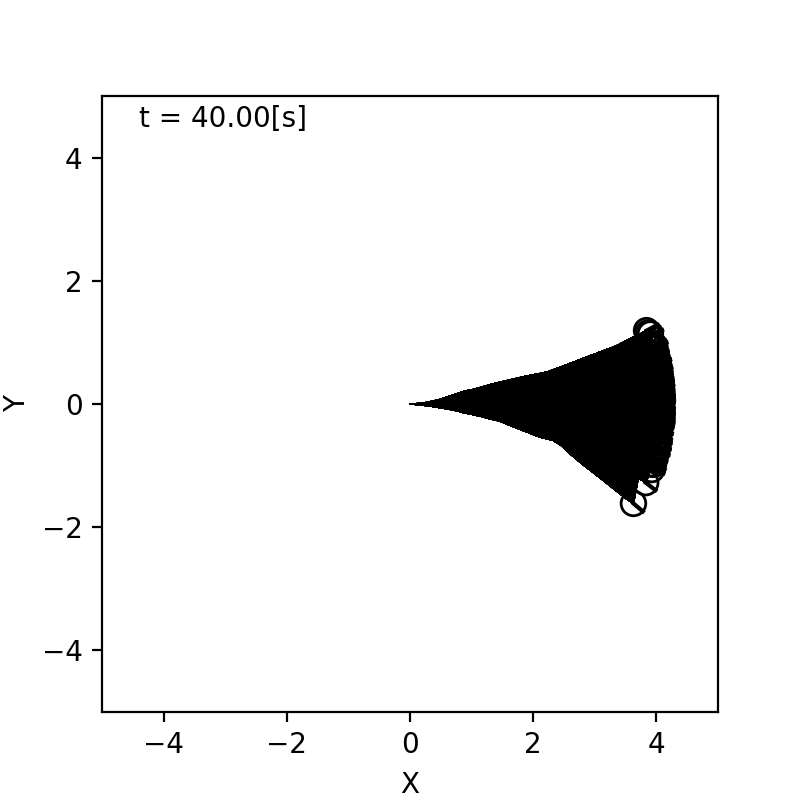

In [2]:
import copy    ###motion_test_linear

world = World(40.0, 0.1)  

initial_pose = np.array([0, 0, 0]).T
robots = []
r = Robot(initial_pose, sensor=None, agent=Agent(0.1, 0.0)) 

for i in range(100):
    copy_r = copy.copy(r)
    copy_r.distance_until_noise = copy_r.noise_pdf.rvs() #最初に雑音が発生するタイミングを変える
    world.append(copy_r)     #worldに登録することでアニメーションの際に動く
    robots.append(copy_r)   #オブジェクトの参照のリストにロボットのオブジェクトを登録

world.draw()

In [3]:
import pandas as pd ###motion_test_stats
poses = pd.DataFrame([ [math.sqrt(r.pose[0]**2 + r.pose[1]**2), r.pose[2]] for r in robots], 
                     columns=['r', 'theta'])
poses.transpose() #縦横を入れ替えて表示

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
r,4.090673,4.077645,4.085194,4.086092,4.090851,4.090996,4.086568,4.044113,4.096156,4.075608,...,4.030356,4.074867,4.089291,4.096824,4.093048,4.091331,4.092609,4.092956,4.093250,4.077268
theta,0.040036,0.427521,0.363955,-0.225018,0.172083,-0.196234,0.096551,0.537365,-0.212932,-0.342822,...,0.494400,0.217923,-0.183160,-0.021532,-0.039112,-0.002919,0.256224,0.191707,-0.060922,0.300955


In [4]:
print(poses["theta"].var()) ###motion_test_sigma_omeganu
print(poses["r"].mean())
math.sqrt(poses["theta"].var()/poses["r"].mean())

0.06833794613425373
4.079105359902083


0.12943403781504334